<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initializations" data-toc-modified-id="Initializations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initializations</a></span></li><li><span><a href="#Standard-Analysis" data-toc-modified-id="Standard-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Standard Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Mass-Matrix" data-toc-modified-id="Mass-Matrix-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Mass Matrix</a></span></li><li><span><a href="#DG-and-HDG-vs-E-DG-and-E-HDG" data-toc-modified-id="DG-and-HDG-vs-E-DG-and-E-HDG-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>DG and HDG vs E-DG and E-HDG</a></span></li></ul></li></ul></li><li><span><a href="#DG-vs-Enriched-DG" data-toc-modified-id="DG-vs-Enriched-DG-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DG vs Enriched DG</a></span><ul class="toc-item"><li><span><a href="#Integration-Order" data-toc-modified-id="Integration-Order-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Integration Order</a></span></li><li><span><a href="#Alpha" data-toc-modified-id="Alpha-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Alpha</a></span></li><li><span><a href="#Order" data-toc-modified-id="Order-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Order</a></span></li></ul></li><li><span><a href="#HDG-vs-Enriched-HDG" data-toc-modified-id="HDG-vs-Enriched-HDG-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>HDG vs Enriched HDG</a></span><ul class="toc-item"><li><span><a href="#Integration-Order" data-toc-modified-id="Integration-Order-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Integration Order</a></span></li><li><span><a href="#Alpha" data-toc-modified-id="Alpha-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Alpha</a></span></li><li><span><a href="#Order" data-toc-modified-id="Order-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Order</a></span></li></ul></li><li><span><a href="#Images" data-toc-modified-id="Images-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Images</a></span><ul class="toc-item"><li><span><a href="#Mass-Matrix" data-toc-modified-id="Mass-Matrix-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Mass Matrix</a></span></li><li><span><a href="#DG-vs-Enriched-DG" data-toc-modified-id="DG-vs-Enriched-DG-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>DG vs Enriched DG</a></span></li><li><span><a href="#HDG-vs-Enriched-HDG" data-toc-modified-id="HDG-vs-Enriched-HDG-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>HDG vs Enriched HDG</a></span></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import pandas as pd
from functools import reduce
from IPython.display import Image, display
import matplotlib.image as mpimg

### Initializations

In [4]:
%store -r dg 
%store -r hdg
%store -r mm 
%store -r emm_x 
%store -r emm_y 
%store -r emm_xy 
%store -r edg
%store -r ehdg
%store -r edg_val
%store -r edg_order
%store -r ehdg_order

In [3]:
## Read analysis results from files
dg_val = pd.read_csv('Files/dgval.csv.', index_col=0)
hdg_val = pd.read_csv('Files/hdgval.csv.', index_col=0)
dg_alpha = pd.read_csv('Files/dgalpha.csv.', index_col=0)
hdg_alpha = pd.read_csv('Files/hdgalpha.csv.', index_col=0)
edg_val = pd.read_csv('Files/edgval.csv.', index_col=0)
ehdg_val = pd.read_csv('Files/hdgval.csv.', index_col=0)
edg_alpha = pd.read_csv('Files/edgalpha.csv.', index_col=0)
ehdg_alpha = pd.read_csv('Files/ehdgalpha.csv.', index_col=0)

In [5]:
dfs = [dg, hdg, mm, emm_x, emm_y, emm_xy, edg, ehdg, edg_order, ehdg_order]
dataframe = reduce(lambda left, right: pd.merge(left,right, on=['Order', 'Mesh Size']), dfs)

In [6]:
columns = ['Order', 'Mesh_Size', 'dg', 'hdg', 'mm', 'emm_x', 'emm_y', 'emm_xy', 'edg', 'ehdg', 'edg_order', 'ehdg_order']
dataframe.columns = columns

In [7]:
order_1 = dataframe[dataframe.Order.eq(1.0)]
order_2 = dataframe[dataframe.Order.eq(2.0)]
order_3 = dataframe[dataframe.Order.eq(3.0)]

### Standard Analysis

##### Mass Matrix

In [ ]:
## Plot for the L2 error for the mass matrix(mm) problem with and without enrichment
#mm - standard mm problem
#emm_x - enrichment of x-axis for mm problem 
#emm_y - enrichment of y- axis for mm problem
#emm_xy - enrichment of xy-axis for mm problem

# Paramters used for computations 
## Alpha = 10, epsilon = 0.01, beta = (2,0.0001)

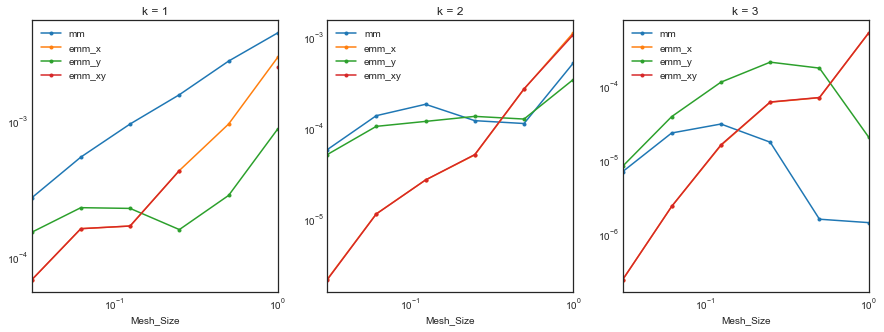

In [14]:
y = ['mm', 'emm_x', 'emm_y', 'emm_xy']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
order_1.plot(x='Mesh_Size', y=y, ax=ax1, legend=True, title='k = 1', style='.-', loglog=True)
order_2.plot(x='Mesh_Size', y=y, ax=ax2, legend=True, title='k = 2', style='.-', loglog=True)
order_3.plot(x='Mesh_Size', y=y, ax=ax3, legend=True, title='k = 3', style='.-', loglog=True)

##### DG and HDG vs E-DG and E-HDG

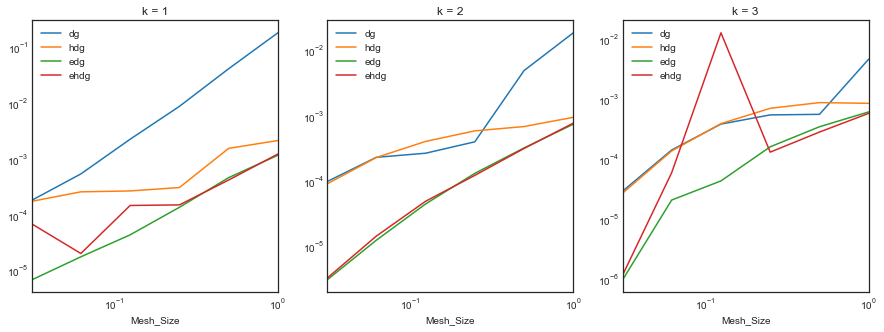

In [15]:
## Plot for the L2 error 
#dg - standard DG
#edg - enriched DG 
#hdg - HDG 
#ehdg - enriched HDG

## Alpha = 10, epsilon = 0.01, beta = (2,0.0001), val = 15
y = ['dg', 'hdg', 'edg', 'ehdg']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
order_1.plot(x='Mesh_Size', y=y, ax=ax1, legend=True, title='k = 1', loglog=True)
order_2.plot(x='Mesh_Size', y=y, ax=ax2, legend=True, title='k = 2', loglog=True)
order_3.plot(x='Mesh_Size', y=y, ax=ax3, legend=True, title='k = 3', loglog=True)

### DG vs Enriched DG

#### Integration Order

In [ ]:
### Check the effect of the integration order

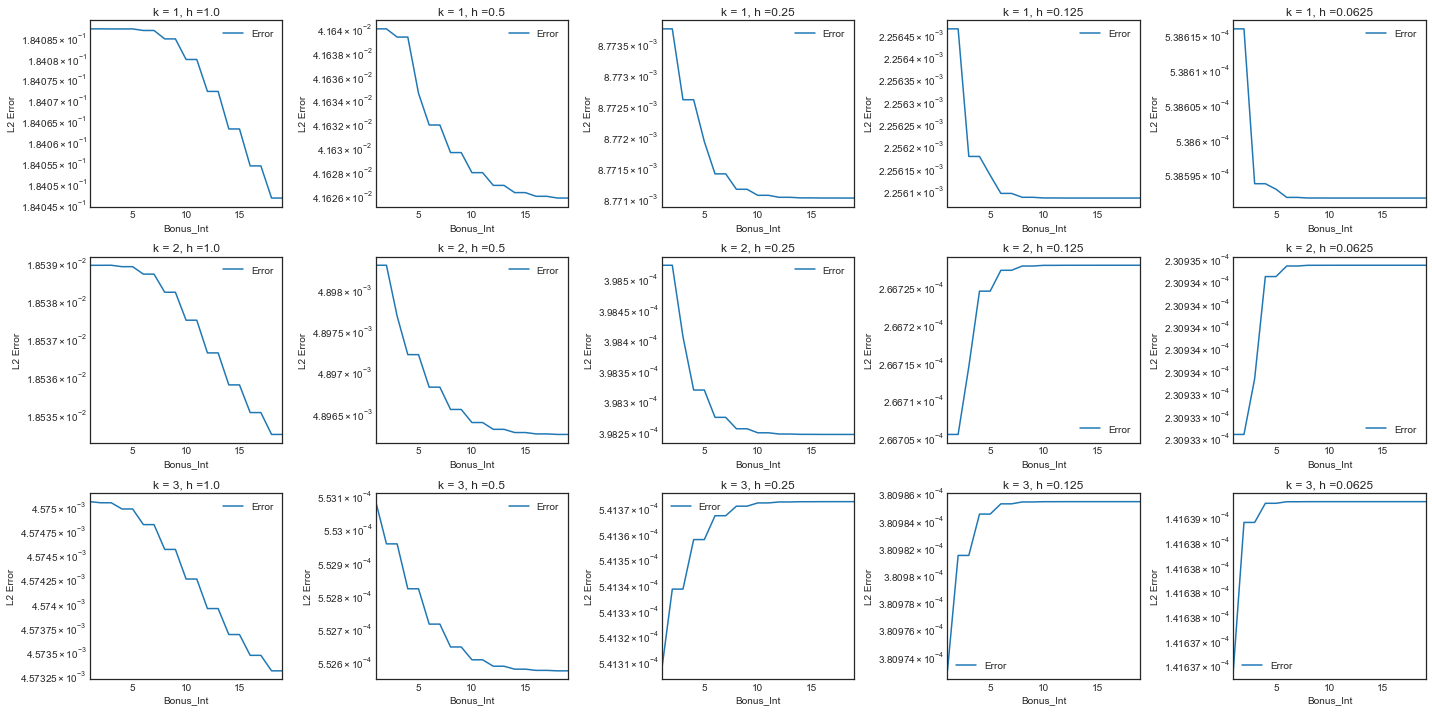

In [23]:
## Standard DG
columns = ['Order', 'Bonus_Int', 'Mesh_Size', 'Error']
dg_val.columns = columns
orders =[1, 2, 3]
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625]

count=1
nrows = len(orders)
ncols = len(mesh_size)
plt.figure(figsize=(20,10))
           
for order in orders:
    for size in mesh_size:
        df = dg_val[dg_val.Order.eq(order) & dg_val.Mesh_Size.eq(size)]
        ax = plt.subplot(nrows, ncols, count)
        df.plot(x='Bonus_Int', y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), logy=True)
        ax.set_ylabel('L2 Error')
        count = count + 1
           
plt.tight_layout()              

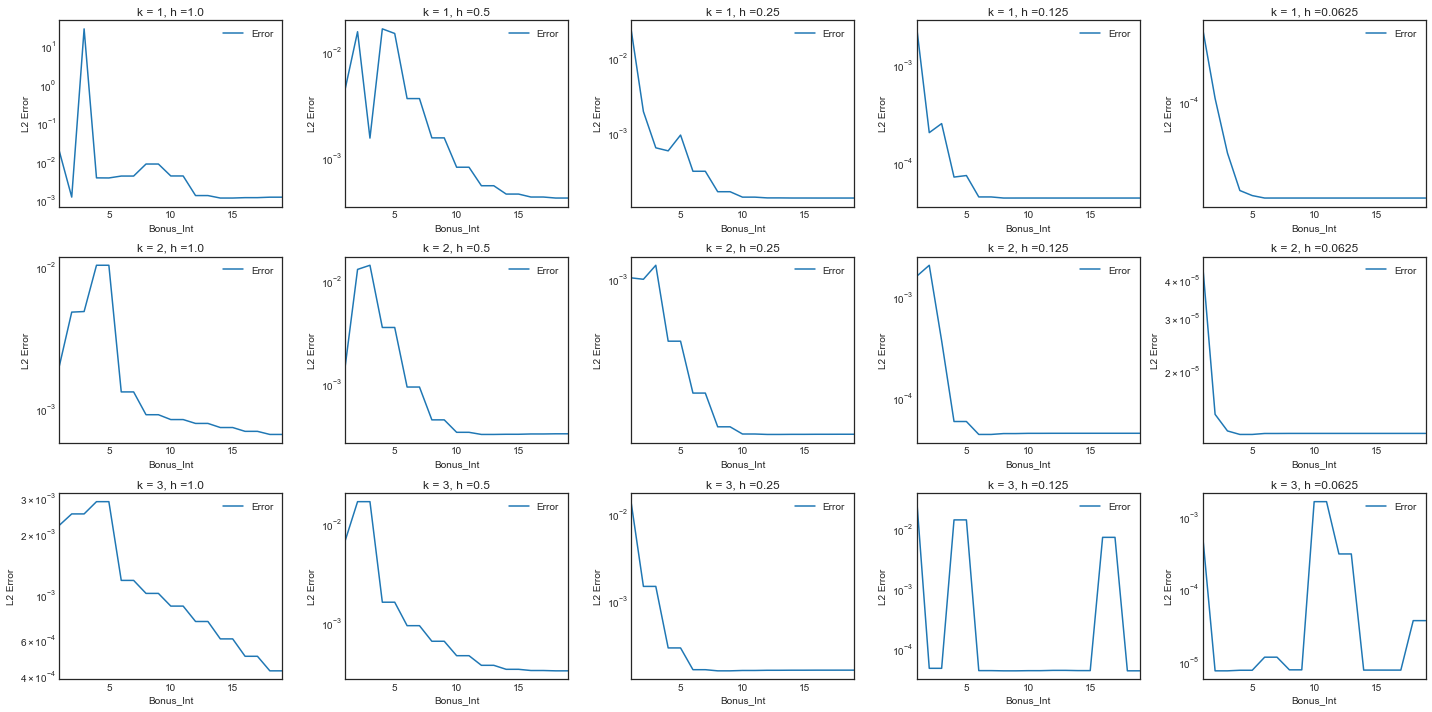

In [24]:
## Enriched DG
edg_val.columns = columns
orders =[1, 2, 3]
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625]

count=1
nrows = len(orders)
ncols = len(mesh_size)
plt.figure(figsize=(20,10))
           
for order in orders:
    for size in mesh_size:
        df = edg_val[edg_val.Order.eq(order) & edg_val.Mesh_Size.eq(size)]
        ax = plt.subplot(nrows, ncols, count)
        df.plot(x='Bonus_Int', y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), logy=True)
        ax.set_ylabel('L2 Error')
        count = count + 1
           
plt.tight_layout()              

#### Alpha

In [ ]:
## Check the effect of alpha

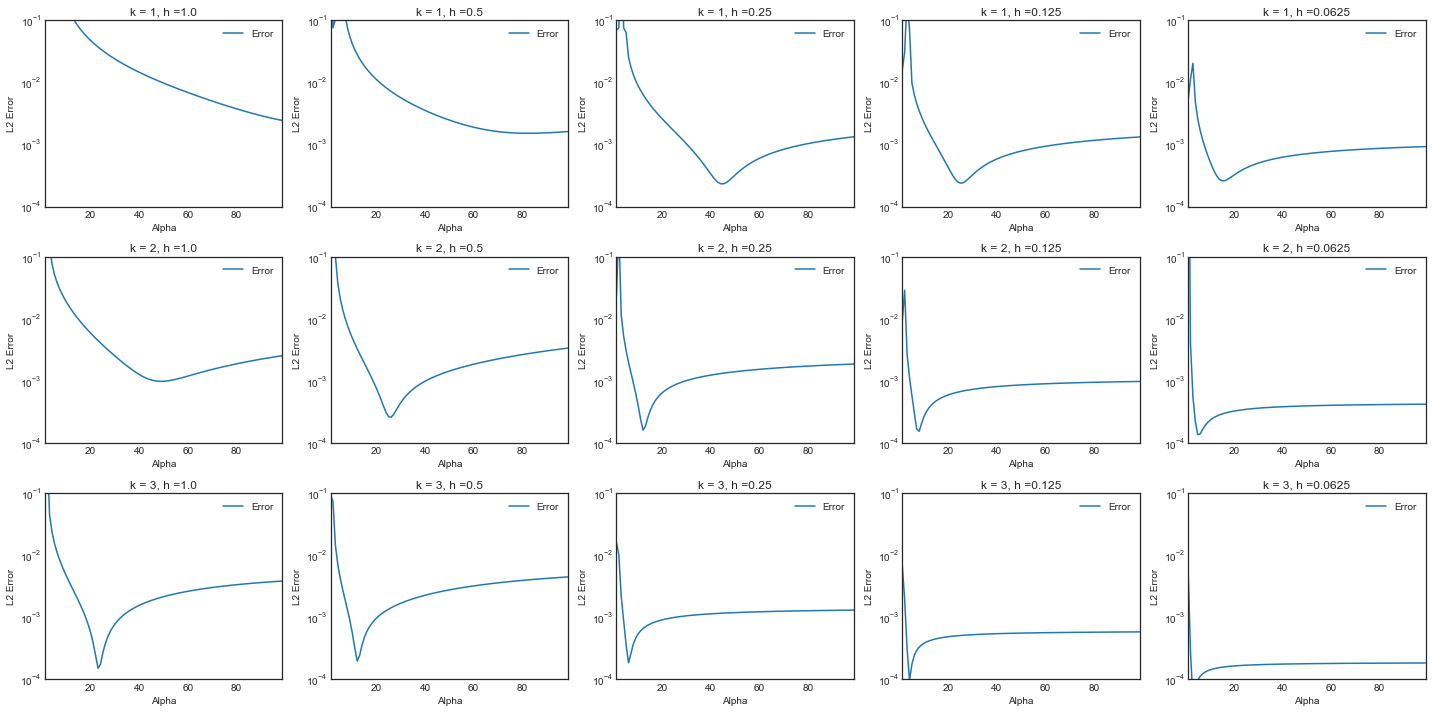

In [10]:
## Standard DG
columns = ['Order', 'Alpha', 'Mesh_Size', 'Error']
dg_alpha.columns = columns
orders =[1, 2, 3]
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625]

count=1
nrows = len(orders)
ncols = len(mesh_size)
plt.figure(figsize=(20,10))
           
for order in orders:
    for size in mesh_size:
        df = dg_alpha[dg_alpha.Order.eq(order) & dg_alpha.Mesh_Size.eq(size)]
        ax = plt.subplot(nrows, ncols, count)
        df.plot(x='Alpha', y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), logy=True, ylim=(1e-4,1e-1))
        ax.set_ylabel('L2 Error')
        count = count + 1
           
plt.tight_layout()              

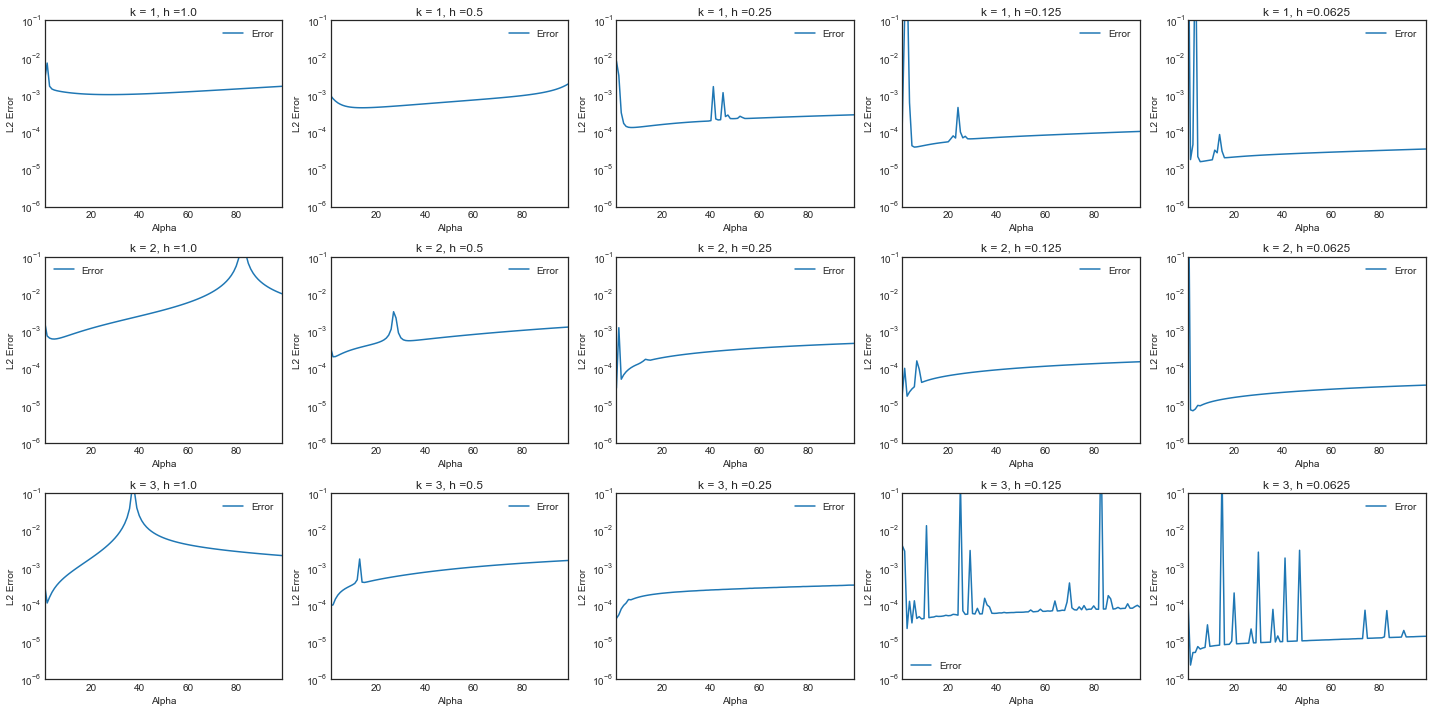

In [12]:
## Enriched DG
columns = ['Order', 'Alpha', 'Mesh_Size', 'Error']
edg_alpha.columns = columns
orders =[1, 2, 3]
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625]

count=1
nrows = len(orders)
ncols = len(mesh_size)
plt.figure(figsize=(20,10))
           
for order in orders:
    for size in mesh_size:
        df = edg_alpha[edg_alpha.Order.eq(order) & edg_alpha.Mesh_Size.eq(size)]
        ax = plt.subplot(nrows, ncols, count)
        df.plot(x='Alpha', y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), logy=True, ylim=(1e-6,1e-1))
        ax.set_ylabel('L2 Error')
        count = count + 1
           
plt.tight_layout()              

#### Order

In [ ]:
### check the effect of varying the order of the enrichment space compared to keeping it constant (order=0)

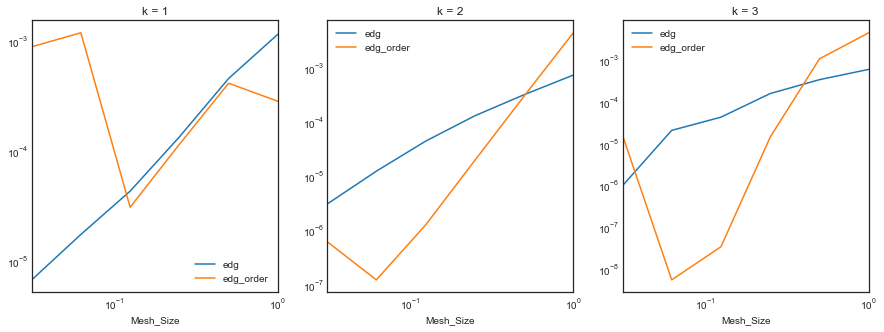

In [39]:
## Alpha = 10, epsilon = 0.01, beta = (2,0.0001), val = 15
## We change the order of the enrichment space
y = ['edg', 'edg_order']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
order_1.plot(x='Mesh_Size', y=y, ax=ax1, legend=True, title='k = 1', loglog=True)
order_2.plot(x='Mesh_Size', y=y, ax=ax2, legend=True, title='k = 2', loglog=True)
order_3.plot(x='Mesh_Size', y=y, ax=ax3, legend=True, title='k = 3', loglog=True)

### HDG vs Enriched HDG

#### Integration Order

In [ ]:
##  Effect of the integration order

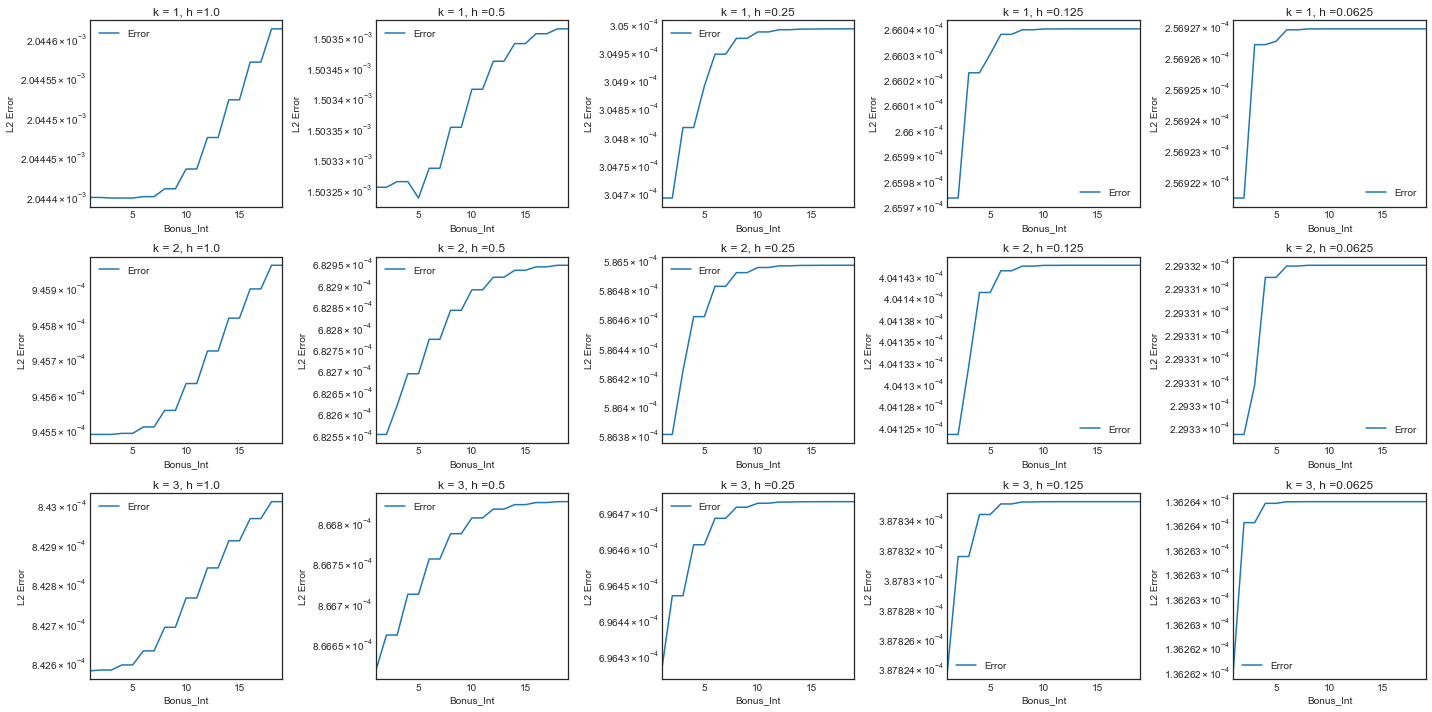

In [27]:
## Standard HDG
columns = ['Order', 'Bonus_Int', 'Mesh_Size', 'Error']
hdg_val.columns = columns
orders =[1, 2, 3]
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625]

count=1
nrows = len(orders)
ncols = len(mesh_size)
plt.figure(figsize=(20,10))
           
for order in orders:
    for size in mesh_size:
        df = hdg_val[hdg_val.Order.eq(order) & hdg_val.Mesh_Size.eq(size)]
        ax = plt.subplot(nrows, ncols, count)
        df.plot(x='Bonus_Int', y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), logy=True)
        ax.set_ylabel('L2 Error')
        count = count + 1
           
plt.tight_layout()              

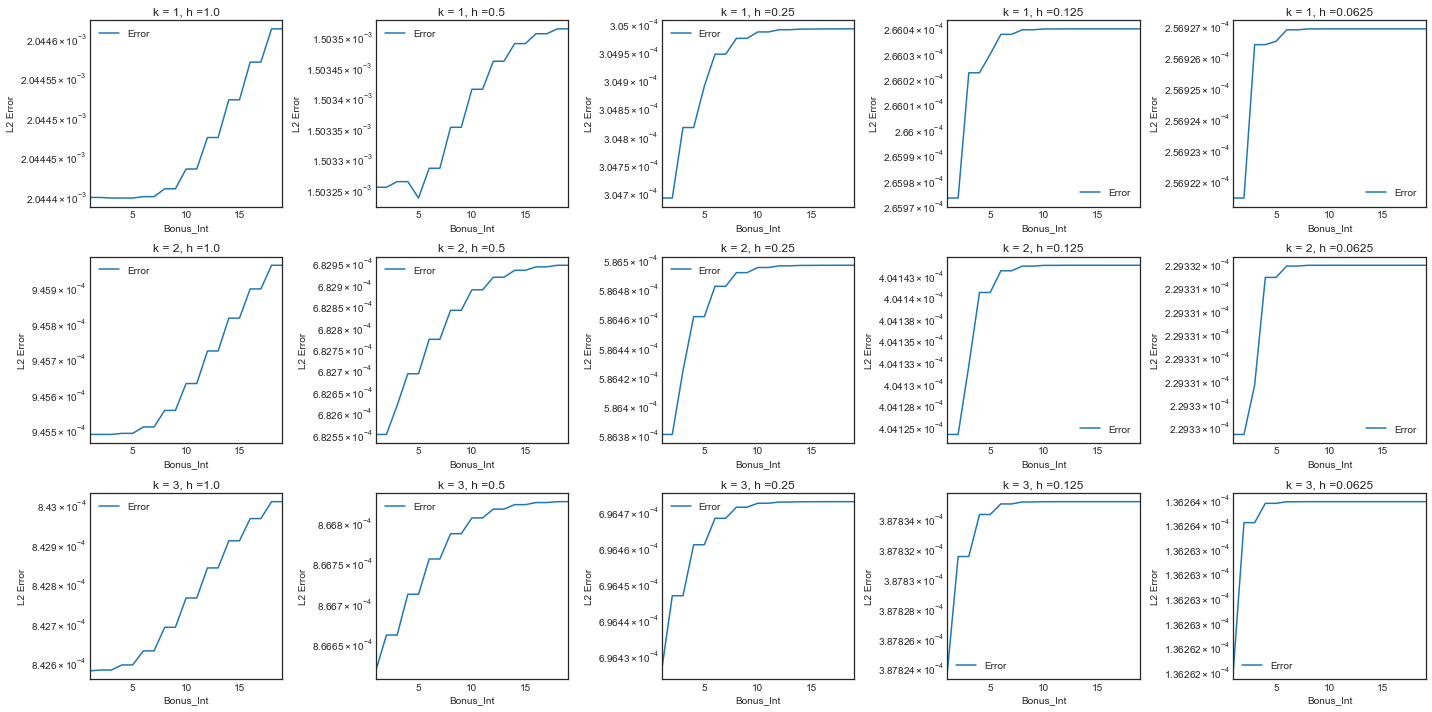

In [28]:
## Enriched HDG
columns = ['Order', 'Bonus_Int', 'Mesh_Size', 'Error']
ehdg_val.columns = columns
orders =[1, 2, 3]
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625]

count=1
nrows = len(orders)
ncols = len(mesh_size)
plt.figure(figsize=(20,10))
           
for order in orders:
    for size in mesh_size:
        df = ehdg_val[ehdg_val.Order.eq(order) & ehdg_val.Mesh_Size.eq(size)]
        ax = plt.subplot(nrows, ncols, count)
        df.plot(x='Bonus_Int', y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), logy=True)
        ax.set_ylabel('L2 Error')
        count = count + 1
           
plt.tight_layout()              

#### Alpha

In [ ]:
### Effect of alpha 

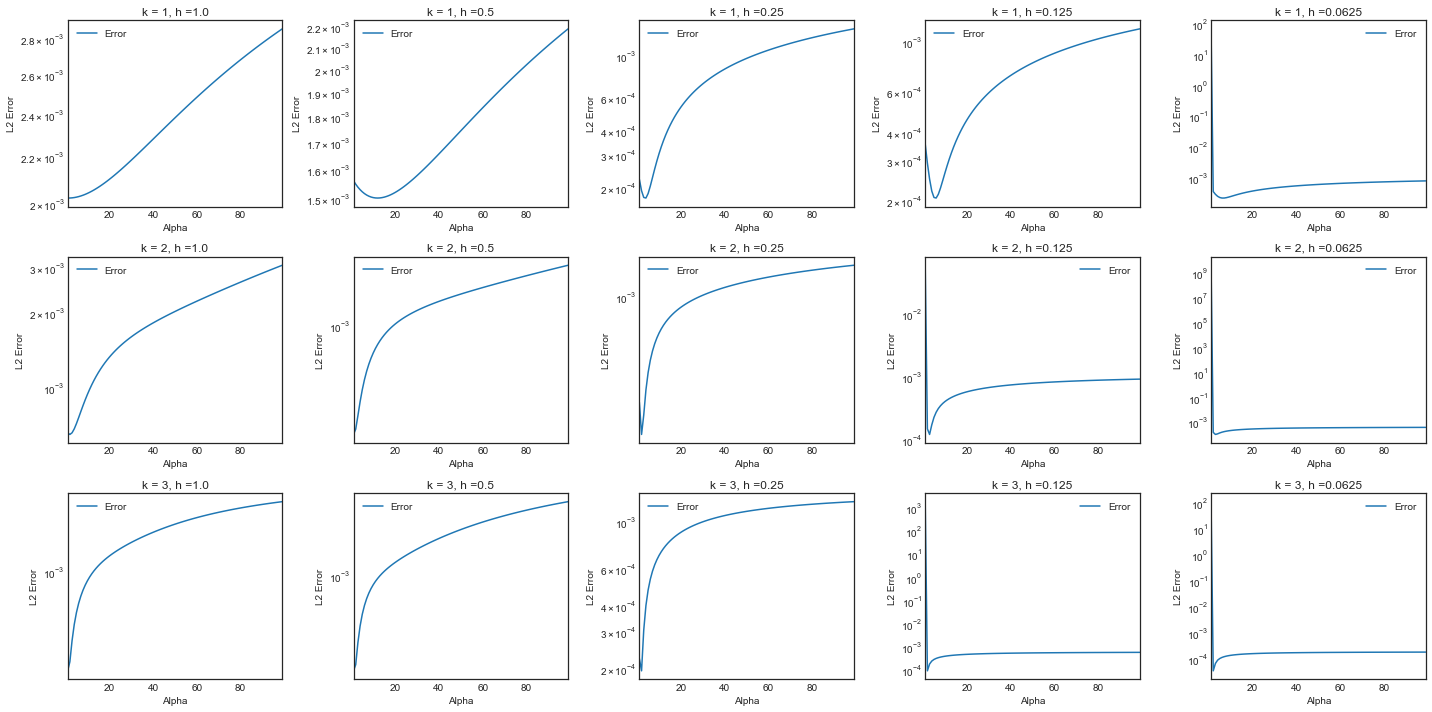

In [30]:
## Standard HDG
columns = ['Order', 'Alpha', 'Mesh_Size', 'Error']
hdg_alpha.columns = columns
orders =[1, 2, 3]
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625]

count=1
nrows = len(orders)
ncols = len(mesh_size)
plt.figure(figsize=(20,10))
           
for order in orders:
    for size in mesh_size:
        df = hdg_alpha[hdg_alpha.Order.eq(order) & hdg_alpha.Mesh_Size.eq(size)]
        ax = plt.subplot(nrows, ncols, count)
        df.plot(x='Alpha', y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), logy=True)
        ax.set_ylabel('L2 Error')
        count = count + 1
           
plt.tight_layout()              

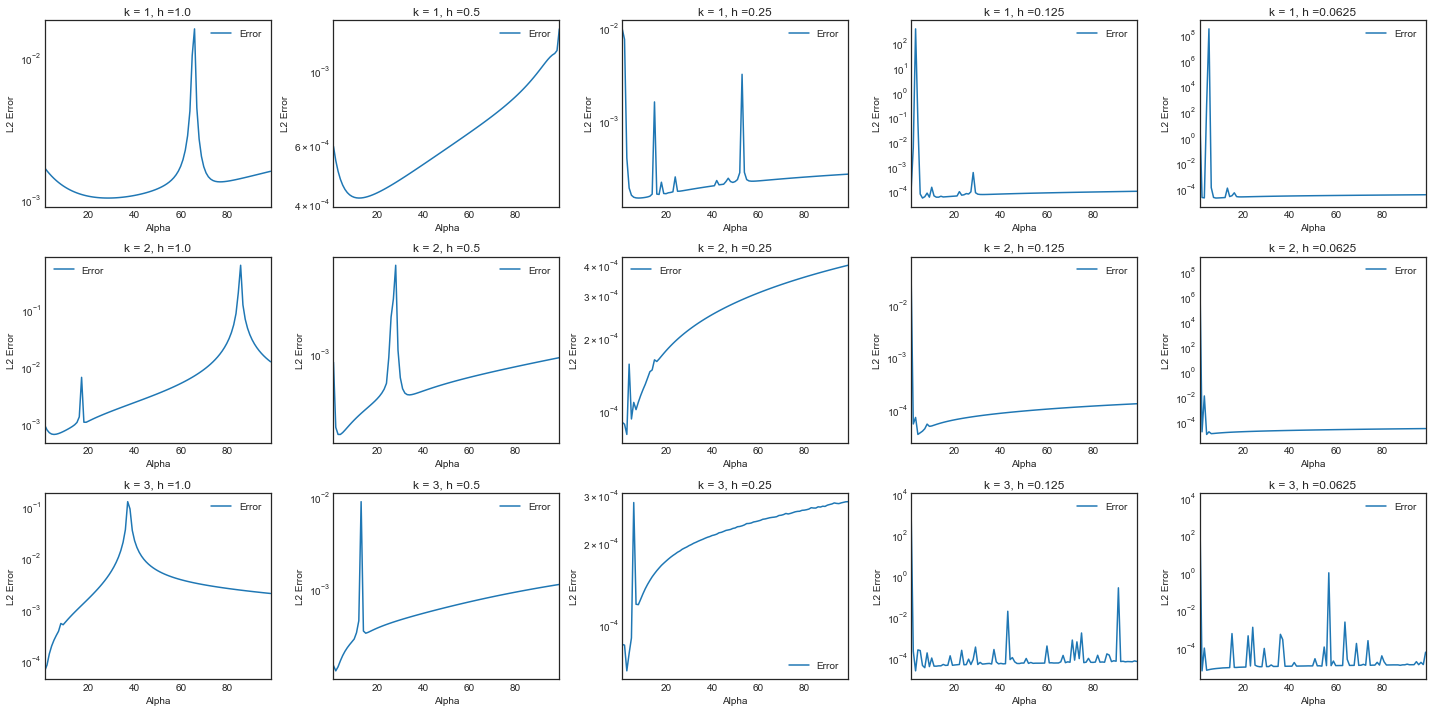

In [31]:
## Enriched HDG
columns = ['Order', 'Alpha', 'Mesh_Size', 'Error']
ehdg_alpha.columns = columns
orders =[1, 2, 3]
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625]

count=1
nrows = len(orders)
ncols = len(mesh_size)
plt.figure(figsize=(20,10))
           
for order in orders:
    for size in mesh_size:
        df = ehdg_alpha[ehdg_alpha.Order.eq(order) & ehdg_alpha.Mesh_Size.eq(size)]
        ax = plt.subplot(nrows, ncols, count)
        df.plot(x='Alpha', y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), logy=True)
        ax.set_ylabel('L2 Error')
        count = count + 1
           
plt.tight_layout()              

#### Order

In [ ]:
### check the effect of varying the order of the enrichment space compared to keeping it constant (order=0)

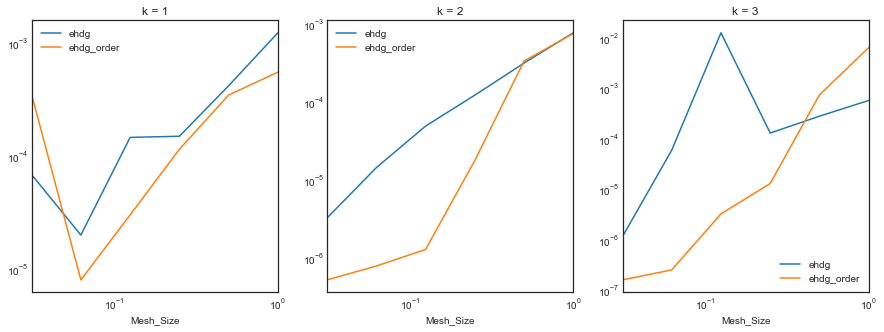

In [44]:
## Alpha = 10, epsilon = 0.01, beta = (2,0.0001), val = 15
## We change the order of the enrichment space
y = ['ehdg', 'ehdg_order']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
order_1.plot(x='Mesh_Size', y=y, ax=ax1, legend=True, title='k = 1', loglog=True)
order_2.plot(x='Mesh_Size', y=y, ax=ax2, legend=True, title='k = 2', loglog=True)
order_3.plot(x='Mesh_Size', y=y, ax=ax3, legend=True, title='k = 3', loglog=True)

### Images

In [ ]:
#### Images below were generated with the following parameters
## Alpha = 10, epsilon = 0.01, beta = (2,0.0001), val(bonus_intorder = 15

## TODO: Enlarging figsize doesn't necessarily make image larger

#### Mass Matrix

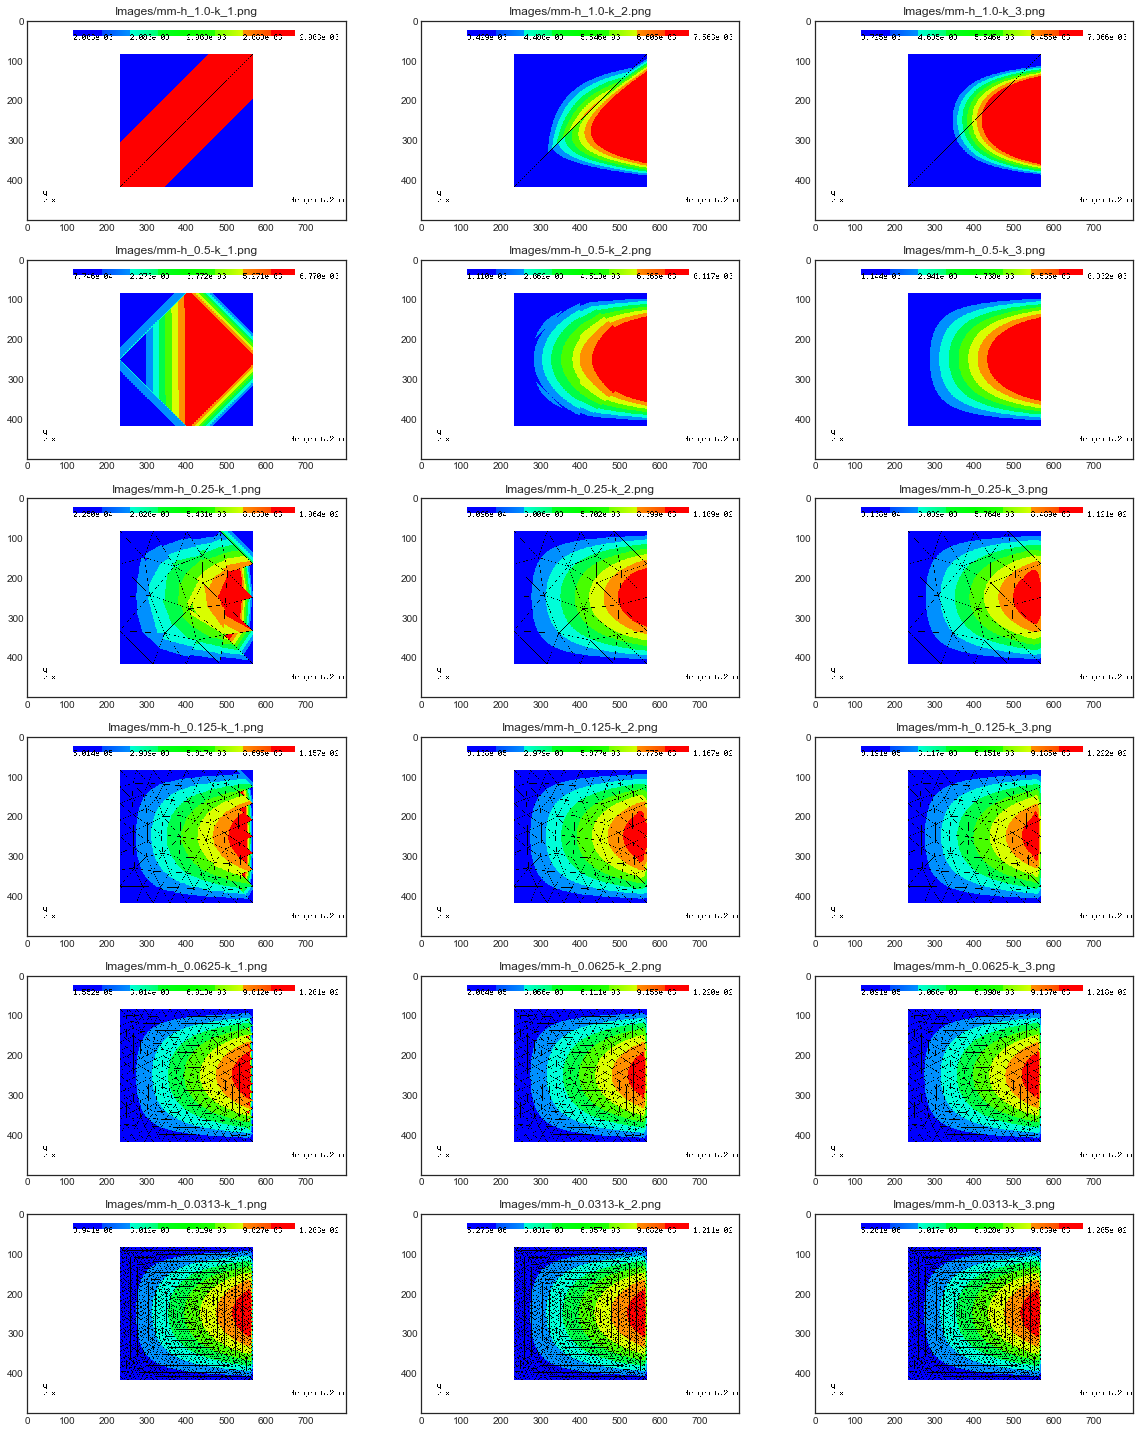

In [56]:
## Standard Mass Matrix
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313]
orders = [1, 2, 3]
plt.figure(figsize=(20,30))
columns = 3
listOfImageNames = ['Images/' + "mm-h_"+str(size)+"-k_"+str(order)+".png" for size in mesh_size for order in orders]

for i, imageName in enumerate(listOfImageNames):
    plt.subplot(len(listOfImageNames) / columns + 1, columns, i + 1)
    img= mpimg.imread(imageName)
    plt.imshow(img)
    plt.title(imageName)

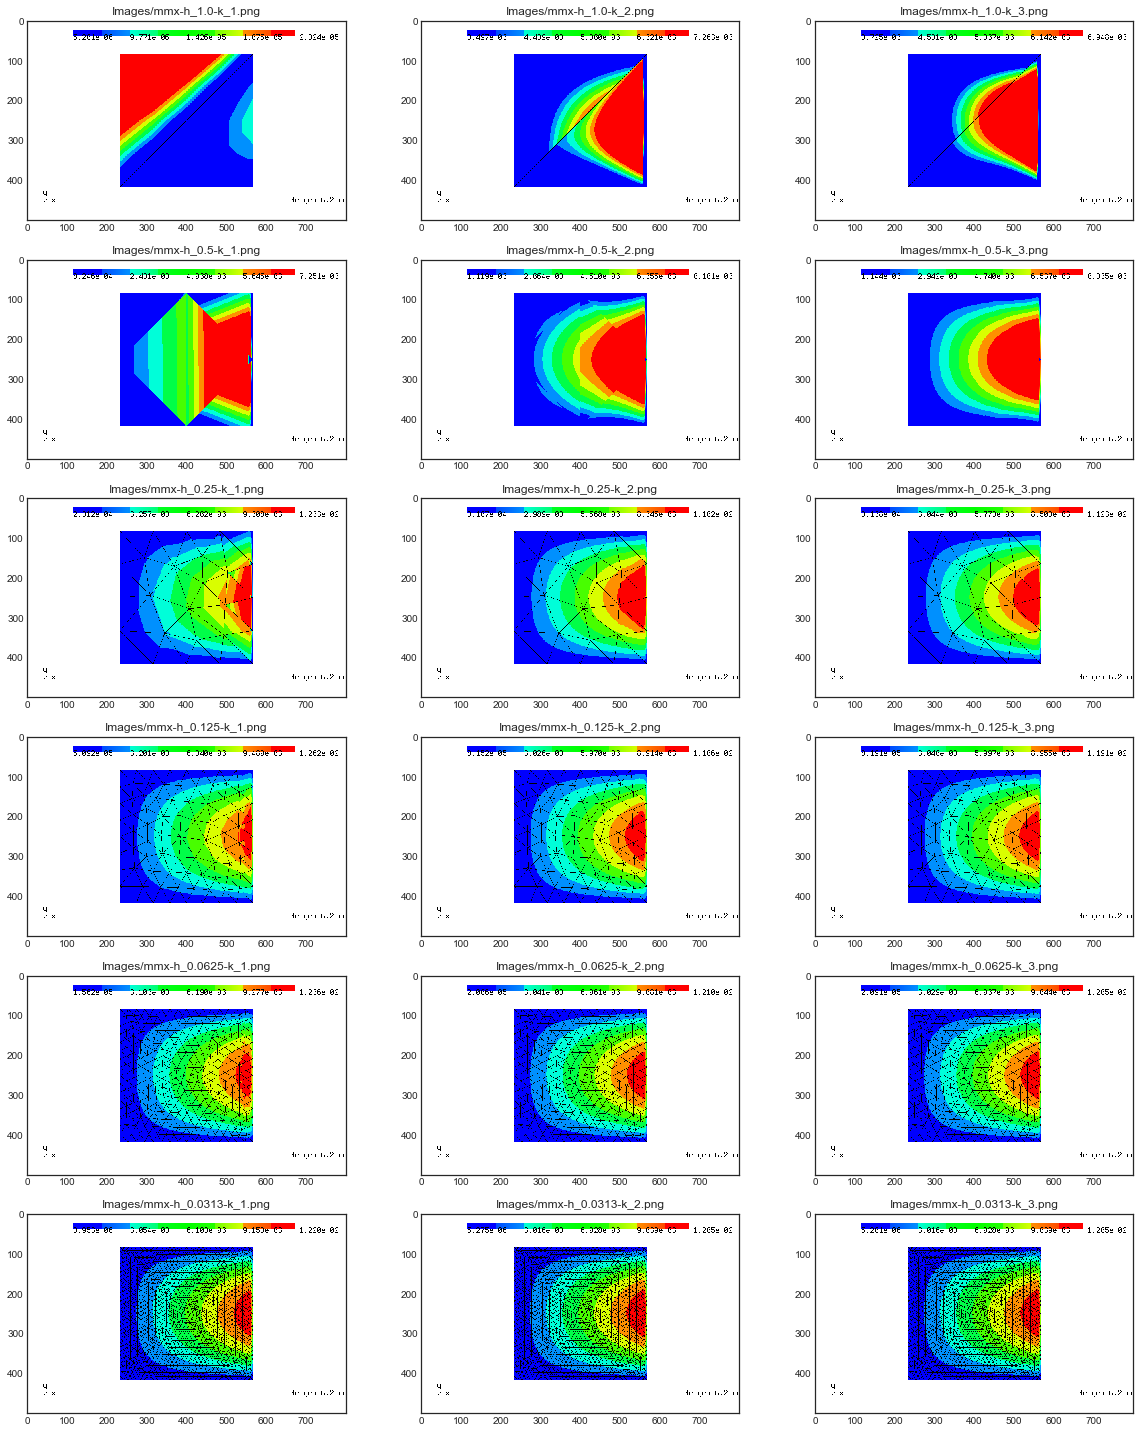

In [61]:
## Enrich x-axis
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313]
orders = [1, 2, 3]
plt.figure(figsize=(20,30))
columns = 3
listOfImageNames = ['Images/' + "mmx-h_"+str(size)+"-k_"+str(order)+".png" for size in mesh_size for order in orders]

for i, imageName in enumerate(listOfImageNames):
    plt.subplot(len(listOfImageNames) / columns + 1, columns, i + 1)
    img= mpimg.imread(imageName)
    plt.imshow(img)
    plt.title(imageName)

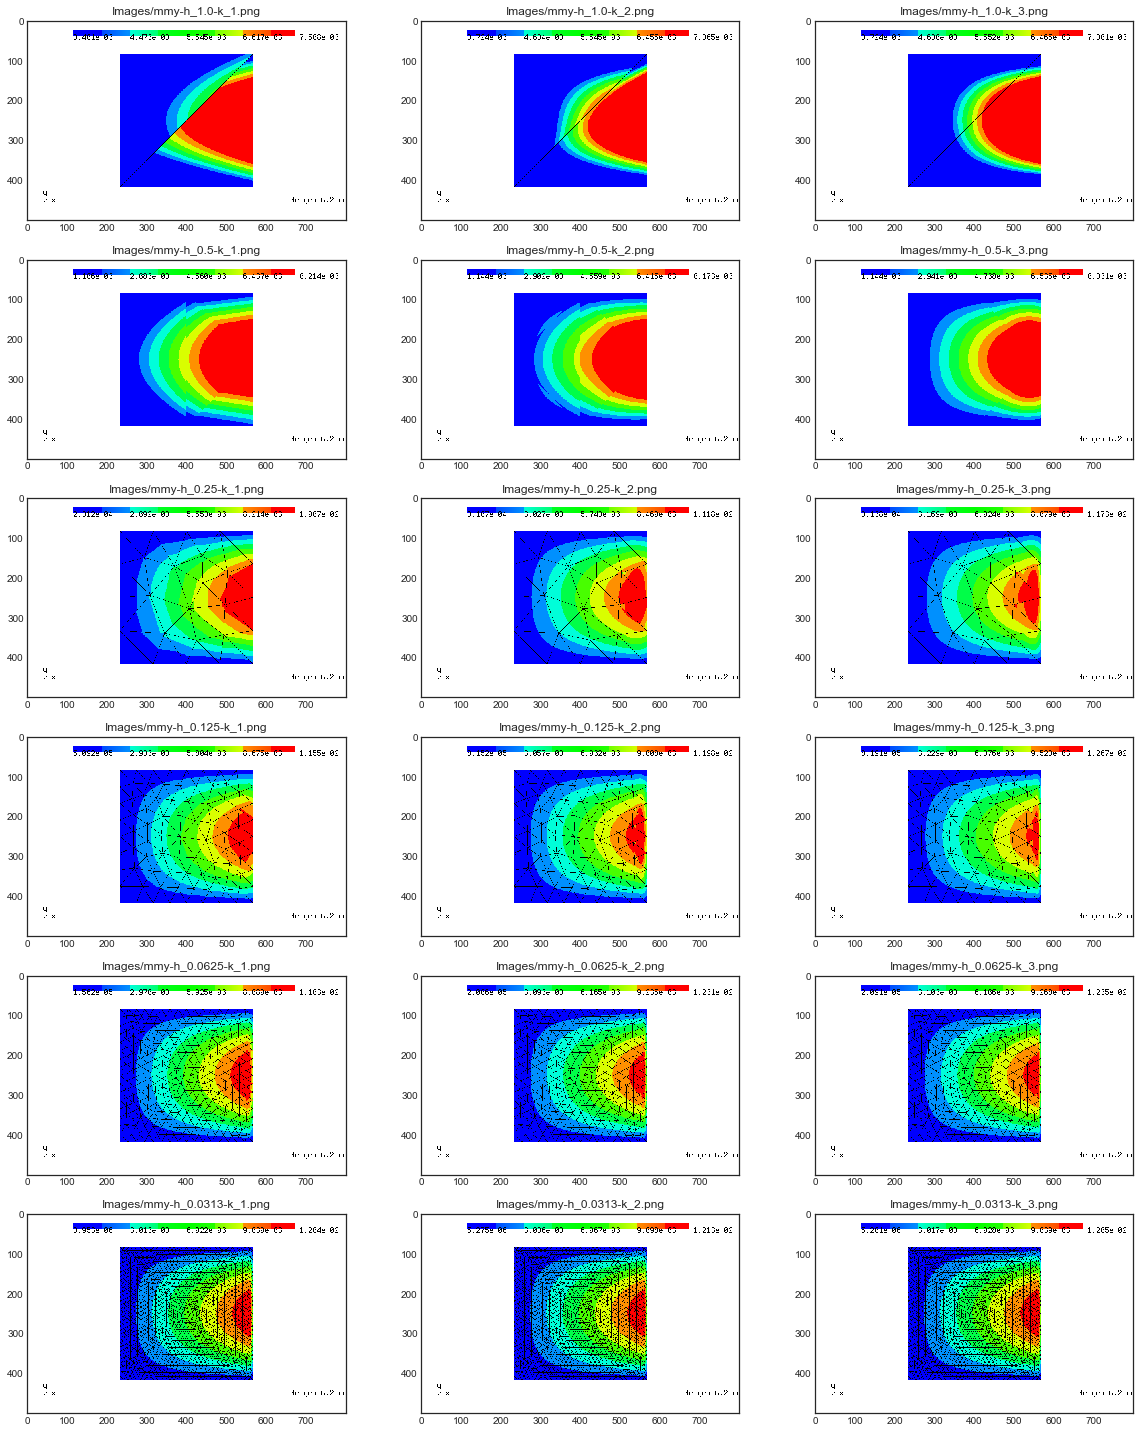

In [54]:
## Enrich y-axis
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313]
orders = [1, 2, 3]
plt.figure(figsize=(20,30))
columns = 3
listOfImageNames = ['Images/' + "mmy-h_"+str(size)+"-k_"+str(order)+".png" for size in mesh_size for order in orders]

for i, imageName in enumerate(listOfImageNames):
    plt.subplot(len(listOfImageNames) / columns + 1, columns, i + 1)
    img= mpimg.imread(imageName)
    plt.imshow(img)
    plt.title(imageName)

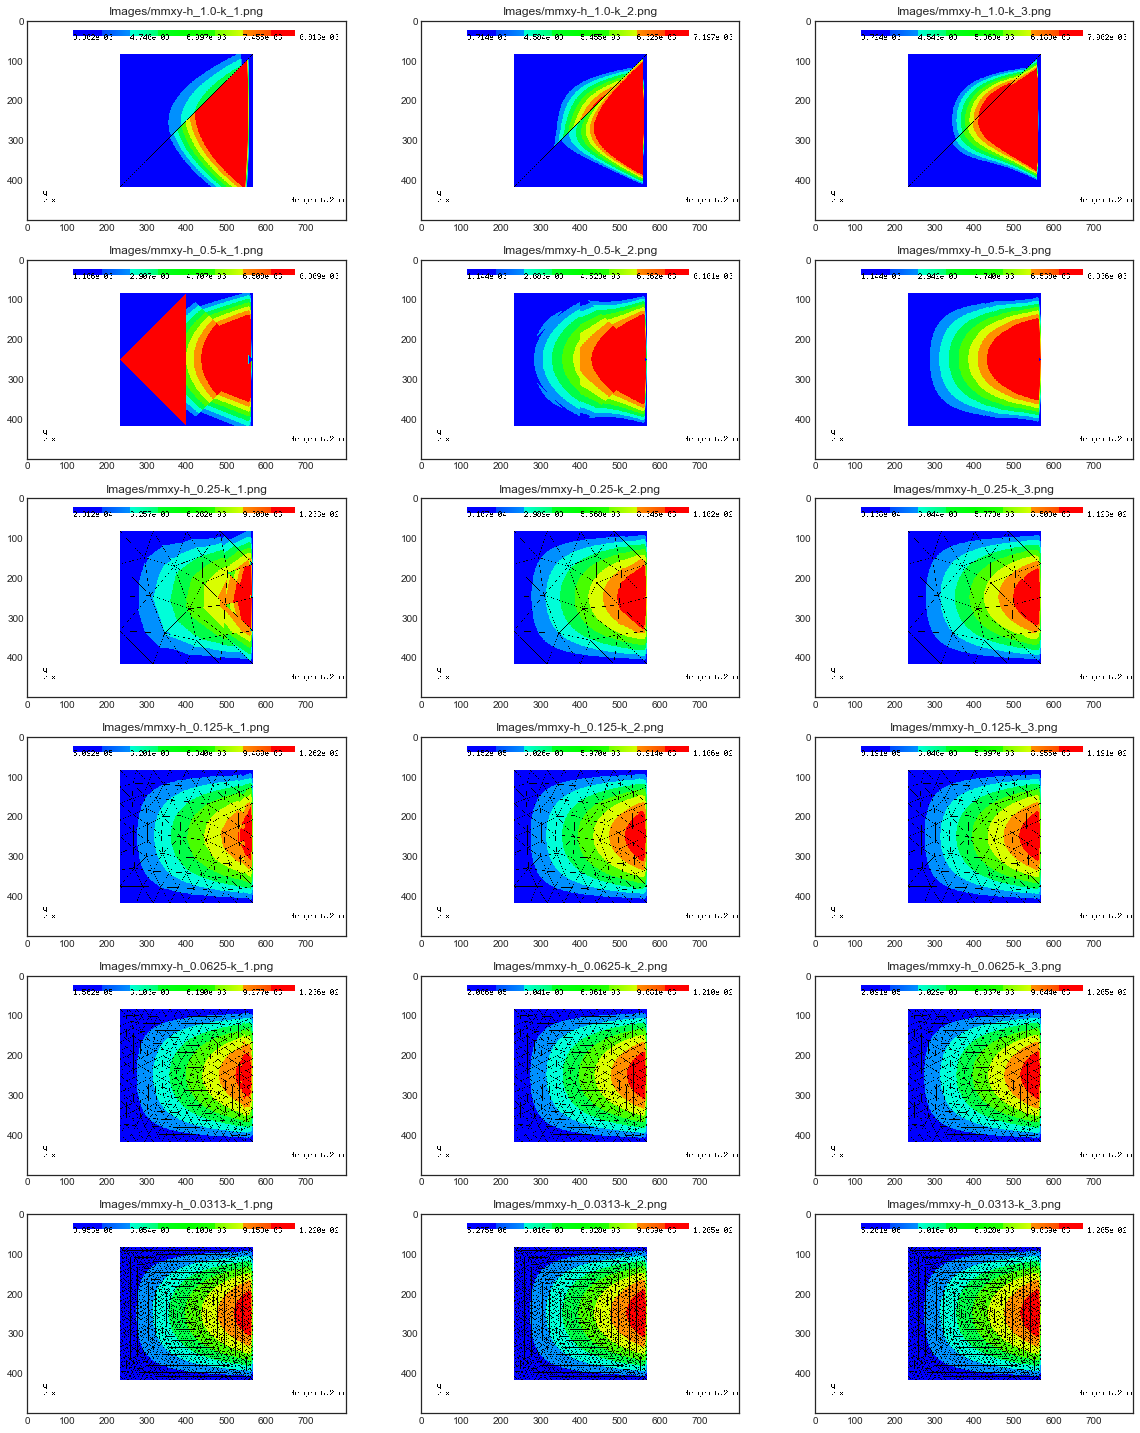

In [51]:
## Enrich x-y axis
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313]
orders = [1, 2, 3]
plt.figure(figsize=(20,30))
columns = 3
listOfImageNames = ['Images/' + "mmxy-h_"+str(size)+"-k_"+str(order)+".png" for size in mesh_size for order in orders]

for i, imageName in enumerate(listOfImageNames):
    plt.subplot(len(listOfImageNames) / columns + 1, columns, i + 1)
    img= mpimg.imread(imageName)
    plt.imshow(img)
    plt.title(imageName)

#### DG vs Enriched DG

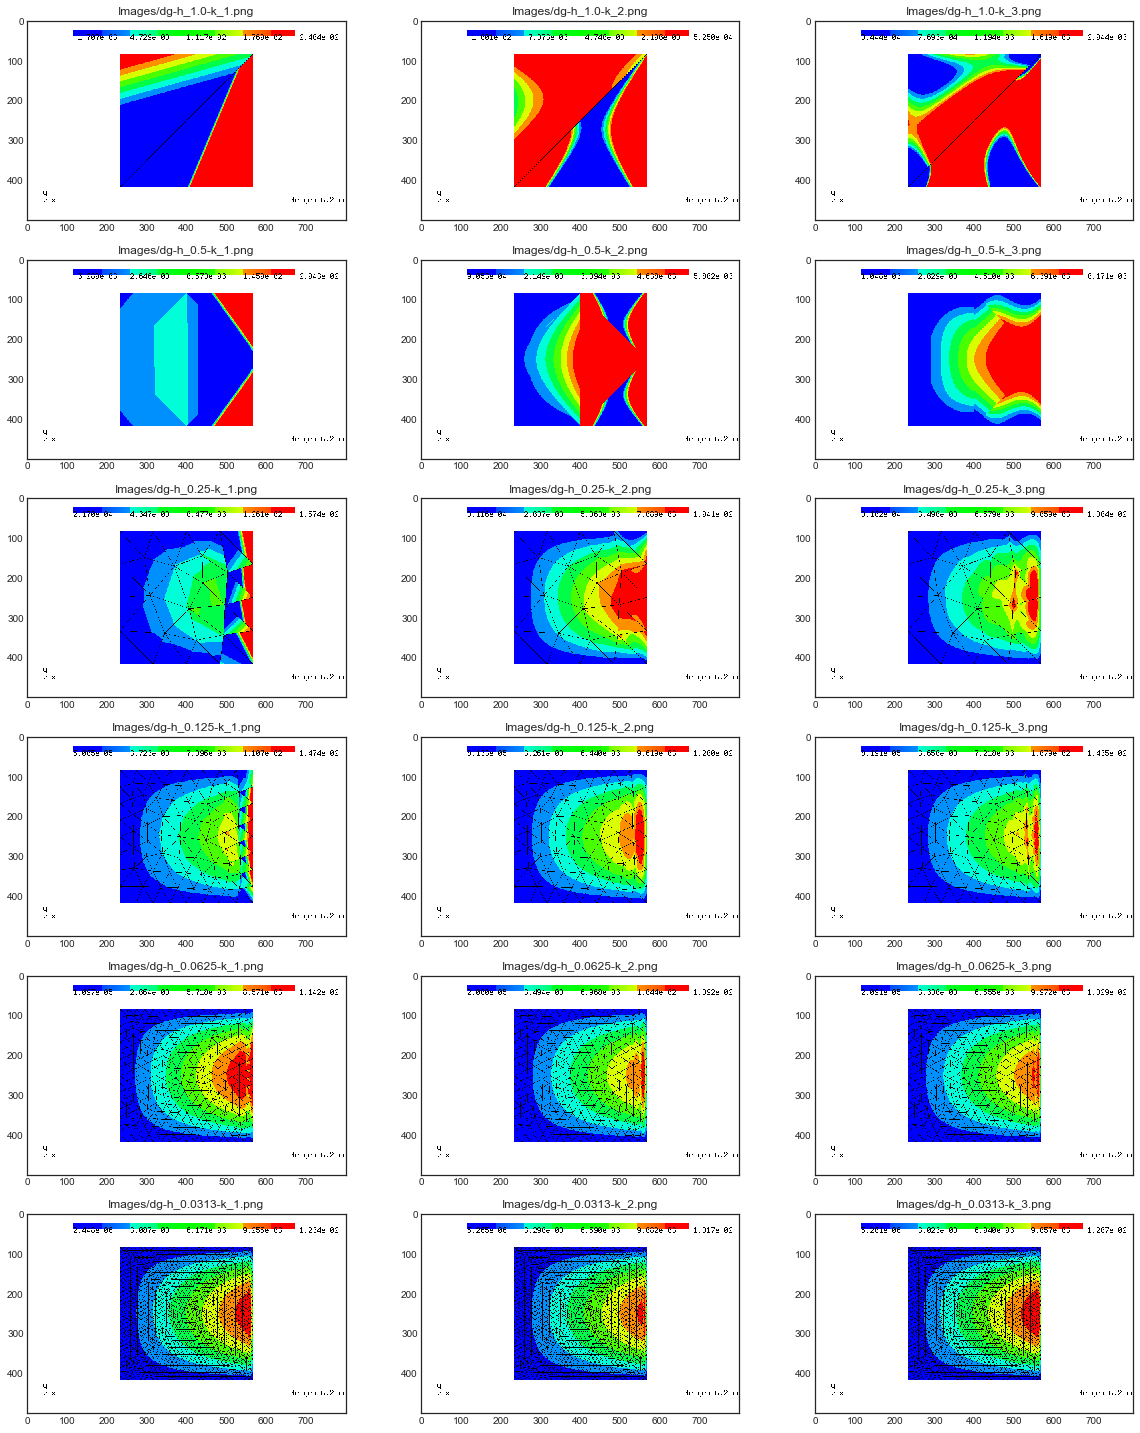

In [45]:
## Alpha = 10, epsilon = 0.01, beta = (2,0.0001), (val = 15)
## *val is for the EDG
## Standard DG
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313]
orders = [1, 2, 3]
plt.figure(figsize=(20,30))
columns = 3
listOfImageNames = ['Images/' + "dg-h_"+str(size)+"-k_"+str(order)+".png" for size in mesh_size for order in orders]

for i, imageName in enumerate(listOfImageNames):
    plt.subplot(len(listOfImageNames) / columns + 1, columns, i + 1)
    img= mpimg.imread(imageName)
    plt.imshow(img)
    plt.title(imageName)

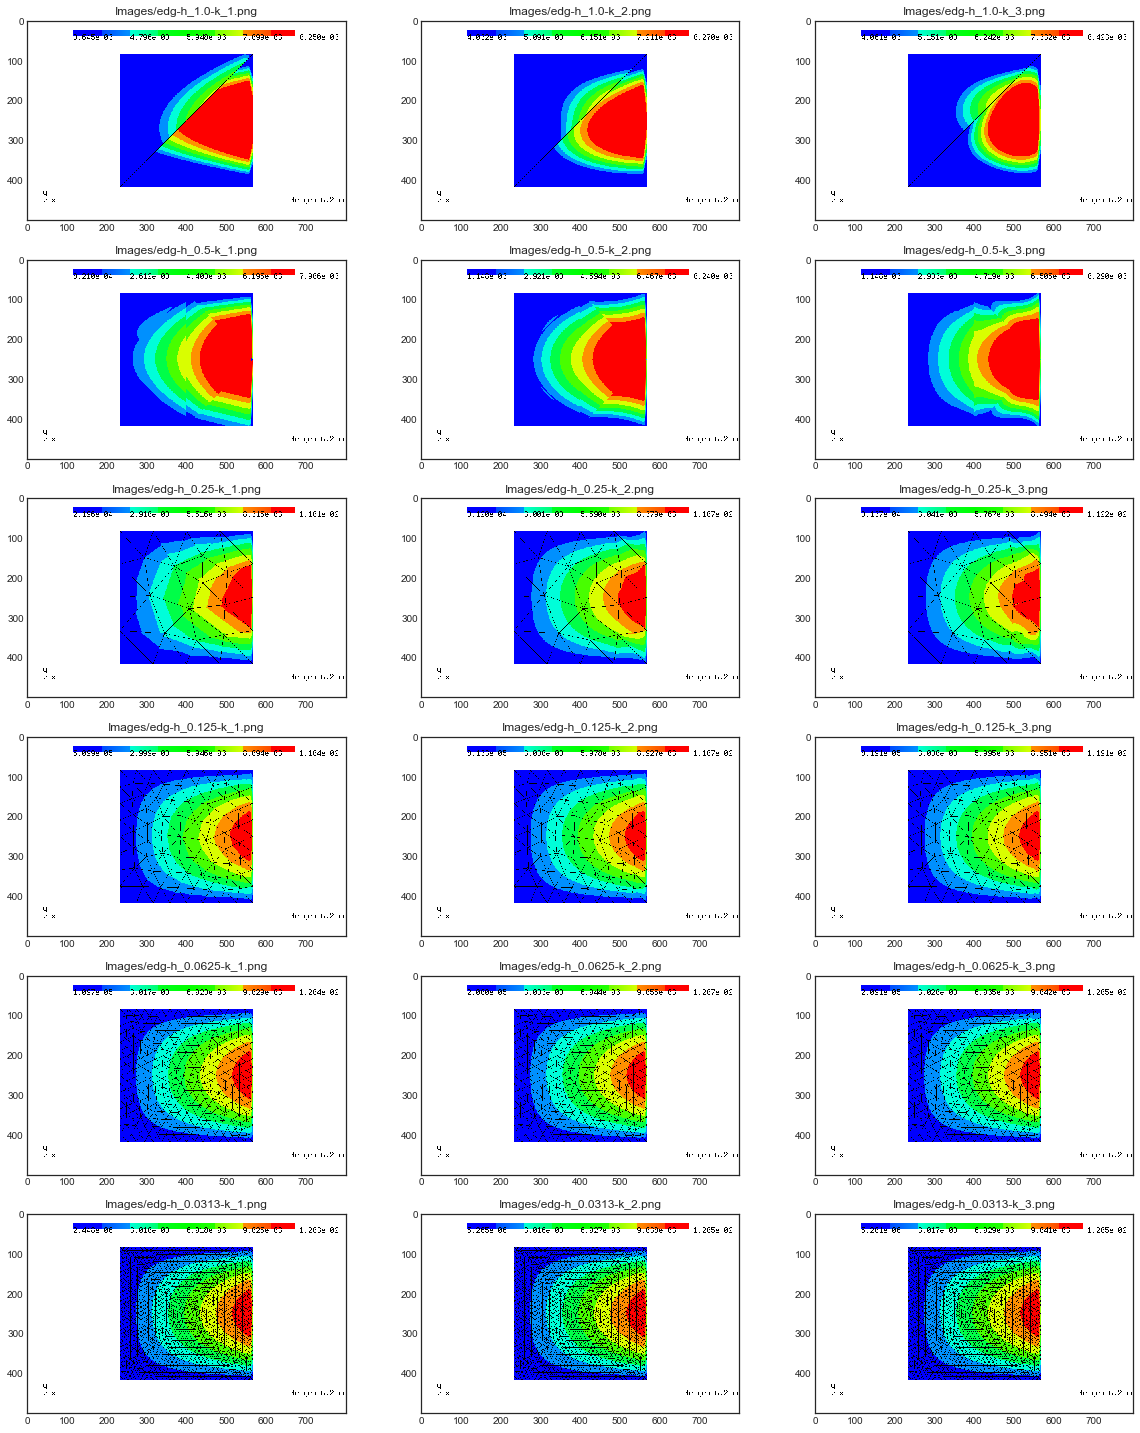

In [46]:
## Enriched DG
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313]
orders = [1, 2, 3]
plt.figure(figsize=(20,30))
columns = 3
listOfImageNames = ['Images/' + "edg-h_"+str(size)+"-k_"+str(order)+".png" for size in mesh_size for order in orders]

for i, imageName in enumerate(listOfImageNames):
    plt.subplot(len(listOfImageNames) / columns + 1, columns, i + 1)
    img= mpimg.imread(imageName)
    plt.imshow(img)
    plt.title(imageName)

#### HDG vs Enriched HDG

In [ ]:
## Alpha = 10, epsilon = 0.01, beta = (2,0.0001), (val = 15)
## *val is for the EDG
## Standard HDG
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313]
orders = [1, 2, 3]
plt.figure(figsize=(20,30))
columns = 3
listOfImageNames = ['Images/' + "hdg-h_"+str(size)+"-k_"+str(order)+".png" for size in mesh_size for order in orders]

for i, imageName in enumerate(listOfImageNames):
    plt.subplot(len(listOfImageNames) / columns + 1, columns, i + 1)
    img= mpimg.imread(imageName)
    plt.imshow(img)
    plt.title(imageName)

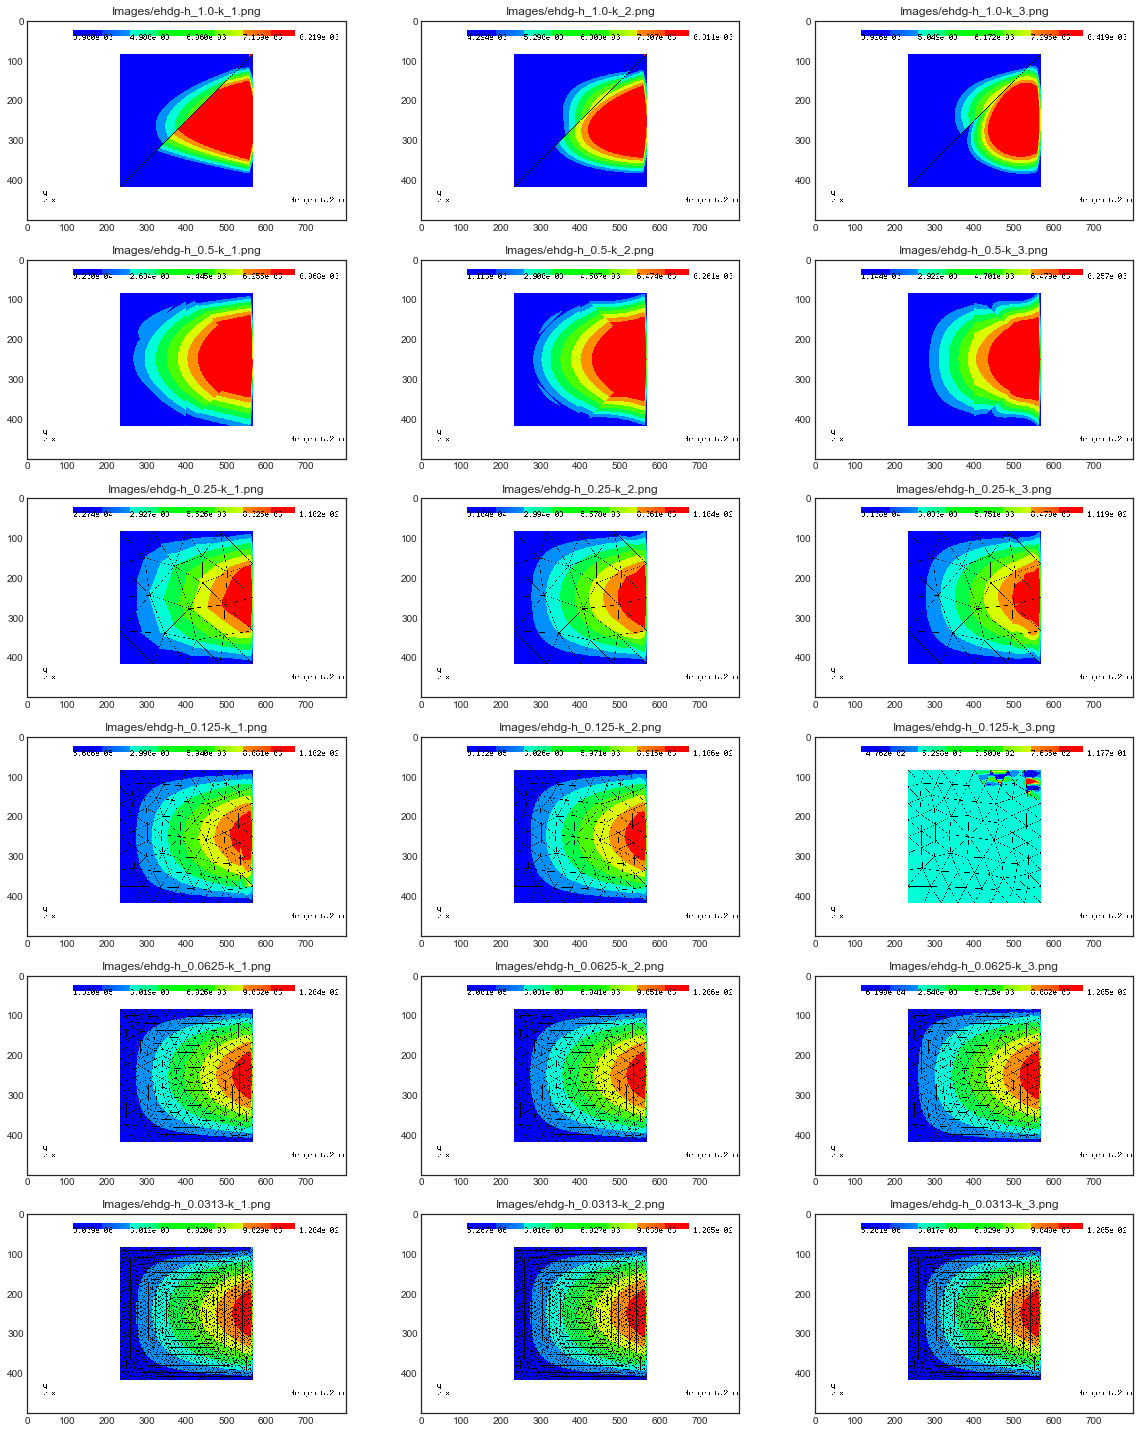

In [47]:
## Enriched HDG
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313]
orders = [1, 2, 3]
plt.figure(figsize=(20,30))
columns = 3
listOfImageNames = ['Images/' + "ehdg-h_"+str(size)+"-k_"+str(order)+".png" for size in mesh_size for order in orders]

for i, imageName in enumerate(listOfImageNames):
    plt.subplot(len(listOfImageNames) / columns + 1, columns, i + 1)
    img= mpimg.imread(imageName)
    plt.imshow(img)
    plt.title(imageName)